Damped Harmonic Oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift

In [29]:
class Particle:
    def __init__(self, number_of_time_steps, pos0=0.0, vel0=0.0):
        self.position = np.zeros(_N_TIME_STEPS)
        self.velocity = np.zeros(_N_TIME_STEPS)
        
        self.positions[0] = pos
        self.velocity[0] = vel

In [26]:
class simulation:
    def __init__(self, _N_TIME_STEPS, _TIME_STEP):
        self.time_steps = _N_TIME_STEPS
        self.dt = _TIME_STEP
        self.particle_list = []
        self.time = 0.0
    
    def add_particle(self, inital_pos, inital_vel, number_of_time_steps):
        self.particle_list.append(Particle(inital_pos, inital_vel, number_of_time_steps))
    
    def integrate_step(self, integrator):
        pass
        
    """ """
    def dvdt1(self, x, y, z):
        return -100 * y - 1 * z

    """ """
    def dxdt1(self, x, y, z):
        return z
        
    
    def run_simulation(self, integrator):
        for step in range(self.time_steps - 1):
            for p in self.particle_list:
                p, v = integrator(self.time, p.positions[step], p.velocities[step], dt, self.dxdt1, self.dvdt1)
                self.positions[step + 1] = p
                self.velocities[step + 1] = v
                self.time = self.time + dt
    
    def get_simulation_results():
        return self.particle_list

In [2]:
""" """
def dvdt1(x, y, z):
    return -100 * y - 1 * z

""" """
def dxdt1(x, y, z):
    return z

In [3]:
def RungeKuttaCoupled1(x, y, z, dx, dydx, dzdx):
    # x --> t
    # y --> x
    # z --> v
    # dydx --> dx/dt = v
    # dzdx --> dv/dt = -x
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    #x = x + dx
    
    return y, z

In [4]:
_TIME_STEP = 0.01

In [5]:
_INITAL_POSITION = 3
_INITAL_VELOCITY = 0

In [6]:
_N_TIME_STEPS = int(1e4)

In [7]:
time = 0
dt = _TIME_STEP
t_end = _N_TIME_STEPS * _TIME_STEP

In [8]:
positions = np.zeros(_N_TIME_STEPS)
velocities = np.zeros(_N_TIME_STEPS)
forces = np.zeros(_N_TIME_STEPS)

ENERGY = np.zeros(_N_TIME_STEPS)

In [9]:
positions[0] = _INITAL_POSITION
velocities[0] = _INITAL_VELOCITY

In [10]:
for step in range(_N_TIME_STEPS - 1):
    p, v = RungeKuttaCoupled1(time, positions[step], velocities[step], dt, dxdt1, dvdt1)
    positions[step + 1] = p
    velocities[step + 1] = v
    time = time + dt

In [11]:
positions;

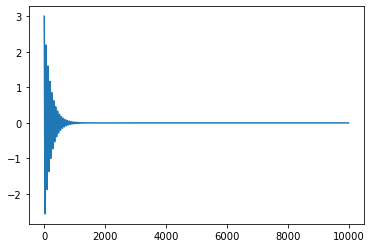

In [12]:
plt.plot(positions)

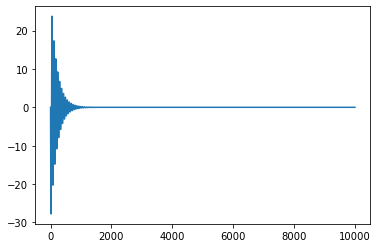

In [13]:
plt.plot(velocities)

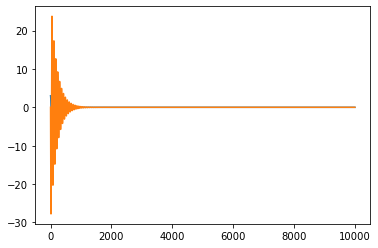

In [14]:
plt.plot(positions)
plt.plot(velocities)

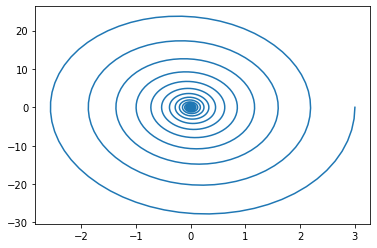

In [15]:
plt.plot(positions, velocities)

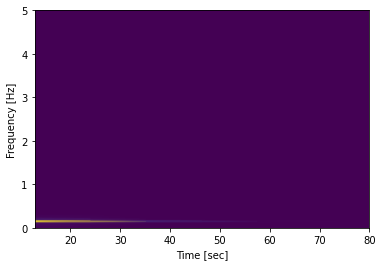

In [16]:
fs = 10
N = 1e5
f, t, Sxx = signal.spectrogram(positions[:1000], fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
df = f[3] - f[2]
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [19]:
def area_of_triangle(x1, x2, x3):
    l1 = sqrt((x1 - x2)**2 + (y1 - y2)**2)
    l2 = sqrt((x2 - x3)**2 + (y2 - y3)**2)
    l3 = sqrt((x3 - x1)**2 + (y3 - y1)**2)

    p = (l1 + l2 + l3)/2
    area = sqrt(p * (p - l1) * (p - l2) * (p - l3))
    
    return area